In [2]:
import pandas as pd # Import pandas library, which contains a collection of data manipulation modules.
import sqlite3      # Import sqlite3 library, which contains a collection of SQL database modules.  
con = sqlite3.connect('chinook.db') # Connection established.
cursor = con.cursor()            # Built-in cursor function called.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country"  # Select aggregated value and GROUP the result.
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count;"
# sql = "SELECT country, COUNT(*) AS count FROM customers GROUP BY country ORDER BY count DESC;"   
# sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId WHERE genres = 'Jazz';"  
sql = "SELECT trackid,tracks.name,albums.Title AS album,media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
# print(type(result))
# print(result)
# print(pd.DataFrame(result)) 
# print('\n')
con.close()

con = sqlite3.connect('tracks_2.db')
cursor = con.cursor()
df = pd.DataFrame(result, columns=['Track_ID','Track_Name','Album_Title','Media_Type','Genres'])
df.to_sql('results',con,if_exists = 'replace',index = False)
con.close()
df

Entry successfully retrieved.


,Track_ID,Track_Name,Album_Title,Media_Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [3]:
import pandas as pd
import sqlite3
con = sqlite3.connect('tracks_2.db')
cursor = con.cursor()

sql = "SELECT genres, COUNT (*) AS count FROM results GROUP BY Genres ORDER BY count DESC;"

try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
    
result = cursor.fetchall()
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','count'
  ])
df.to_csv("genre_order.csv",mode = 'w',index = False)
df

Entry successfully retrieved.


,Genres,count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


In [6]:
import pandas as pd
df.to_csv("genre_order.csv",mode = 'w',index = False)
df = pd.read_csv("genre_order.csv")
df
genre_order_list = df.values.tolist()
print(genre_order_list)
top_ten_list = genre_order_list[0:10]
print(top_ten_list)
df = pd.DataFrame(top_ten_list)
df

[['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61]]
[['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61]]


,0,1
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


Top Ten List 
 [['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61]] 

genre_name ['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz', 'TV Shows', 'Blues', 'Classical', 'Drama', 'R&B/Soul'] 

count_number [1297, 579, 374, 332, 130, 93, 81, 74, 64, 61] 



<ipython-input-9-4f65a7423d25>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


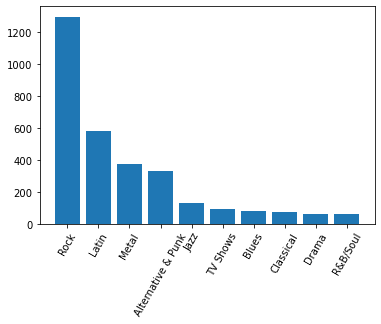

In [9]:
print("Top Ten List","\n",top_ten_list,"\n")
genre_name = []
count_number = []
for i in top_ten_list:
    genre_name.append(i[0])
    count_number.append(i[1])
    
print("genre_name",genre_name,"\n")
print("count_number",count_number,"\n")

from matplotlib import pyplot as plt
plt.bar(range(len(genre_name)),count_number)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(genre_name, rotation=60)
plt.show()